<a href="https://colab.research.google.com/github/chirag2saraiya/TSAI-DeepVision-EVA4/blob/master/04-Face-Recognition-Part-2/s4_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!cp /content/drive/My\ Drive/e4p2s4/* ./

In [4]:
!unzip -q politicians_dataset.zip  

In [5]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
import math
from PIL import Image
from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
PREDICTOR_PATH = "/content/shape_predictor_5_face_landmarks.dat"
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

In [ ]:
pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 6.1MB/s 


In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1

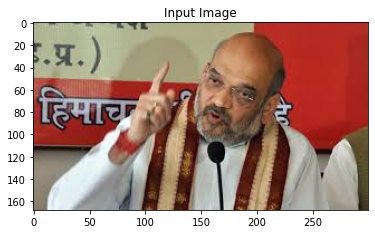

In [ ]:
# Check alignment code on single image before running it for all the frames

# Read image
name = './politicians_dataset/train/Amit_Shah/images_079.jpeg'  #os.path.join(FRAME_SAVE_DIR,'1.jpg')
demoImg = Image.open(name)
plt.imshow(demoImg)
plt.title("Input Image")
plt.show()

In [ ]:
help(MTCNN)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


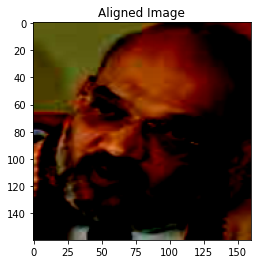

In [ ]:


mtcnn = MTCNN(image_size=160, margin=32)

img_cropped = mtcnn(demoImg)
# Display the results
plt.imshow(np.transpose(img_cropped,(1,2,0)))
plt.title("Aligned Image")
plt.show()

In [ ]:
# Check alignment code on single image before running it for all the frames

# Read image
name = './politicians_dataset/train/Amit_Shah/images_079.jpeg'  #os.path.join(FRAME_SAVE_DIR,'1.jpg')
demoImg = cv2.imread(name)

# Detect landmarks.
points = fbc.getLandmarks(faceDetector, landmarkDetector, demoImg)
points = np.array(points)

# Convert image to floating point in the range 0 to 1
im = np.float32(demoImg)/255.0

# Dimensions of output image
h = 300#demoImg.shape[0]
w = 300#demoImg.shape[1]

print(h,w)

# Normalize image to output coordinates.
imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

300 300


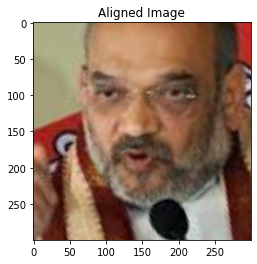

In [ ]:
imNorm = np.uint8(imNorm*255)

# Display the results
plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Image")
plt.show()

In [ ]:
# Apply alignment on all the extracted frames

import glob
INPUT_DIR = '/content/politicians_dataset/'
ALIGNED_DIR ='/content/aligned_dataset'

frameList = list(glob.glob(os.path.join('/content/politicians_dataset/','**/*jpeg'),recursive=True))

for imgPath in frameList:
  #print(imgPath)

  try:
    img = cv2.imread(imgPath)
    # Detect landmarks.
    points = fbc.getLandmarks(faceDetector, landmarkDetector, img)
    points = np.array(points)

    # Convert image to floating point in the range 0 to 1
    im = np.float32(img)/255.0

    # Dimensions of output image
    h = 160#demoImg.shape[0]
    w = 160#demoImg.shape[1]

    # Normalize image to output coordinates.
    imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

    imNorm = np.uint8(imNorm*255)

    # save aligned image with the same name in ALIGNED_FRAME_DIR
    alignedImgPath = (os.path.join(ALIGNED_DIR,*(imgPath.split('/')[-3:])))
    #print(alignedImgPath)
    if not os.path.exists(os.path.split(alignedImgPath)[0]):
      os.makedirs(os.path.split(alignedImgPath)[0])
    #imgName = imgPath.split('/')[-1]
    #alignedImgPath = os.path.join(ALIGNED_FRAME_DIR,imgName)
    cv2.imwrite(alignedImgPath,imNorm)
  
  except Exception as e:
    #print(filePath)
    #print(repr(e))
    pass
  
print('Aligned Entire dataset!!')

Aligned Entire dataset!!


In [ ]:
!zip -r aligned_dataset.zip aligned_dataset/

In [ ]:
!git clone https://github.com/timesler/facenet-pytorch.git

Cloning into 'facenet-pytorch'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 1181 (delta 16), reused 10 (delta 2), pack-reused 1143
Receiving objects: 100% (1181/1181), 22.61 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (566/566), done.


In [6]:
!git clone https://github.com/davidsandberg/facenet.git

Cloning into 'facenet'...
remote: Enumerating objects: 3149, done.
remote: Total 3149 (delta 0), reused 0 (delta 0), pack-reused 3149
Receiving objects: 100% (3149/3149), 2.94 MiB | 2.00 MiB/s, done.
Resolving deltas: 100% (2230/2230), done.


In [7]:
!pip install tensorflow==1.13.0rc1
!pip install scipy==1.1.0

     |████████████████████████████████| 92.6MB 47kB/s 
     |████████████████████████████████| 368kB 49.6MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 3.1MB 53.3MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 31.2MB 103kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug

In [1]:
!echo $PYTHONPATH

import os
os.environ['PYTHONPATH'] += ":/content/facenet/src"

!echo $PYTHONPATH

/env/python
/env/python:/content/facenet/src


In [2]:
!python /content/facenet/src/align/align_dataset_mtcnn.py /content/politicians_dataset/train/ /content/mtcnn_aligned_dataset/train/ --image_size 160 --margin 32

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
!python /content/facenet/src/align/align_dataset_mtcnn.py /content/politicians_dataset/val/ /content/mtcnn_aligned_dataset/val/ --image_size 160 --margin 32 --gpu_memory_fraction 0.25

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [4]:
!pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 12.6MB/s 


In [5]:
from torch import nn, optim, as_tensor
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.nn.init import *
from torchvision import transforms, utils, datasets, models
#from models.inception_resnet_v1 import InceptionResnetV1

import cv2
from PIL import Image
from pdb import set_trace
import time
import copy
from pathlib import Path
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage import io, transform
from tqdm import trange, tqdm
import csv
import glob
import dlib
import pandas as pd
import numpy as np

In [8]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = '/content/mtcnn_aligned_dataset'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=8, 
                                             shuffle=True)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val']}
class_names = image_datasets['train'].classes
class_names

['Amit_Shah',
 'Arvind_Kejriwal',
 'Jayalalitha',
 'Mamata_Banerjee',
 'Mayawati',
 'Narendra_Modi',
 'Rahul_Gandhi',
 'Shashi_Tharoor',
 'Shushma_Swaraj',
 'Smriti_Irani',
 'Sonia_Gandhi',
 'Yogi_Adityanath']

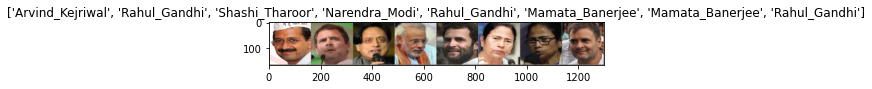

In [7]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated# Get a batch of training data

inputs, classes = next(iter(dataloaders['train']))# Make a grid from batch
out = utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [9]:
from facenet_pytorch import InceptionResnetV1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Running on device: {}'.format(device))
model_ft = InceptionResnetV1(pretrained='vggface2', classify=False, num_classes = len(class_names))

Running on device: cuda:0


In [10]:
list(model_ft.children())[-6:]

[Block8(
   (branch0): BasicConv2d(
     (conv): Conv2d(1792, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU()
   )
   (branch1): Sequential(
     (0): BasicConv2d(
       (conv): Conv2d(1792, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU()
     )
     (1): BasicConv2d(
       (conv): Conv2d(192, 192, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1), bias=False)
       (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU()
     )
     (2): BasicConv2d(
       (conv): Conv2d(192, 192, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0), bias=False)
       (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU()
     )
   )
   (conv2d): Conv2d(384, 1792,

In [11]:
layer_list = list(model_ft.children())[-5:] # all final layers
layer_list

[AdaptiveAvgPool2d(output_size=1),
 Dropout(p=0.6, inplace=False),
 Linear(in_features=1792, out_features=512, bias=False),
 BatchNorm1d(512, eps=0.001, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=512, out_features=8631, bias=True)]

In [12]:
model_ft = nn.Sequential(*list(model_ft.children())[:-5])

In [13]:
for param in model_ft.parameters():
    param.requires_grad = False

In [14]:
class Flatten(nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return x
        
class normalize(nn.Module):
    def __init__(self):
        super(normalize, self).__init__()
        
    def forward(self, x):
        x = F.normalize(x, p=2, dim=1)
        return x

In [15]:
model_ft.avgpool_1a = nn.AdaptiveAvgPool2d(output_size=1)
model_ft.last_linear = nn.Sequential(
    Flatten(),
    nn.Linear(in_features=1792, out_features=512, bias=False),
    normalize())
model_ft.logits = nn.Linear(layer_list[4].in_features, len(class_names))
model_ft.softmax = nn.Softmax(dim=1)
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=1e-3, momentum=0.9)# Decay LR by a factor of *gamma* every *step_size* epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [22]:
def train_model(model, criterion, optimizer, scheduler,num_epochs=25):
    since = time.time()
    FT_losses = []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0    
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)    
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode            
            
            running_loss = 0.0
            running_corrects = 0            
            
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)                
                # zero the parameter gradients
                optimizer.zero_grad()                
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        #scheduler.step()
                
                FT_losses.append(loss.item())
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)         
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))            
            
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, FT_losses

In [ ]:
model_ft = model_ft.to(device)
model_ft, FT_losses = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=100)

plt.figure(figsize=(10,5))
plt.title("FRT Loss During Training")
plt.plot(FT_losses, label="FT loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 0/99
----------
train Loss: 1.6782 Acc: 0.9940
val Loss: 1.6809 Acc: 0.9947
Epoch 1/99
----------
train Loss: 1.6813 Acc: 0.9927
val Loss: 1.7033 Acc: 0.9842
Epoch 2/99
----------
train Loss: 1.6793 Acc: 0.9933
val Loss: 1.6700 Acc: 0.9947
Epoch 3/99
----------
train Loss: 1.6790 Acc: 0.9933
val Loss: 1.6701 Acc: 0.9947
Epoch 4/99
----------
train Loss: 1.6783 Acc: 0.9927
val Loss: 1.6689 Acc: 0.9947
Epoch 5/99
----------
train Loss: 1.6761 Acc: 0.9940
val Loss: 1.6849 Acc: 0.9921
Epoch 6/99
----------
train Loss: 1.6795 Acc: 0.9920
val Loss: 1.6679 Acc: 0.9947
Epoch 7/99
----------
train Loss: 1.6768 Acc: 0.9940
val Loss: 1.7187 Acc: 0.9736
Epoch 8/99
----------
train Loss: 1.6750 Acc: 0.9940
val Loss: 1.6706 Acc: 0.9947
Epoch 9/99
----------
train Loss: 1.6761 Acc: 0.9927
val Loss: 1.6681 Acc: 0.9947
Epoch 10/99
----------
train Loss: 1.6758 Acc: 0.9927
val Loss: 1.6675 Acc: 0.9947
Epoch 11/99
----------
train Loss: 1.6762 Acc: 0.9927
val Loss: 1.6806 Acc: 0.9947
Epoch 12/99
--

In [20]:
# Transfer model to cpu and save to be used with aws lambda
cpu_model = model_ft.to('cpu')
traced_model = torch.jit.trace(cpu_model,torch.randn(1,3,224,224).to('cpu'))
traced_model.save("/content/politician_face_recoginition_model_cpu.pt")

In [21]:
!cp politician_face_recoginition_model_cpu.pt /content/drive/My\ Drive/e4p2s4/